<a href="https://colab.research.google.com/github/Ahouahounko/Data_and_business/blob/main/resampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Resampling strategies for imbalanced datasets**
by GUIDJIME ADINSI Ahouahounko


## Introduction

**Imbalanced datasets** are a common challenge in machine learning, where one class significantly outnumbers the other. This imbalance can lead to biased models that perform poorly on the minority class. Resampling strategies offer a solution by modifying the dataset to create a more balanced distribution.  In this article, we'll explore various resampling techniques. An application will be done on Fraud detection problematic dataset.

## Data : Credit card Dataset


In [2]:
import pandas as pd
from collections import Counter
import seaborn as sns

from google.colab import drive

In [3]:
drive.mount ('/content/drive')

Mounted at /content/drive


In [26]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/creditcard_sampledata.csv")

data.head(3)

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,64,1.212511,-0.099054,-1.192094,0.286324,2.160516,3.616314,-0.404207,0.842331,...,-0.167496,-0.494695,-0.149785,1.011227,0.883548,-0.329434,0.020370,0.017037,34.70,0
1,1,64,-0.658305,0.406791,2.037461,-0.291298,0.147910,-0.350857,0.945373,-0.172560,...,-0.156096,-0.238805,0.089877,0.421195,-0.352487,0.074783,-0.094192,-0.092493,54.99,0
2,2,124,1.105253,0.541842,0.839421,2.570933,-0.279517,-0.423062,0.088019,0.011622,...,-0.137434,-0.460991,0.189397,0.556329,0.185786,-0.189030,0.000208,0.026167,6.24,0


In [27]:
data = data.drop(['Unnamed: 0','Time'], axis=1)

data.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.212511,-0.099054,-1.192094,0.286324,2.160516,3.616314,-0.404207,0.842331,0.169360,-0.030522,...,-0.167496,-0.494695,-0.149785,1.011227,0.883548,-0.329434,0.020370,0.017037,34.70,0
1,-0.658305,0.406791,2.037461,-0.291298,0.147910,-0.350857,0.945373,-0.172560,0.025133,-0.778135,...,-0.156096,-0.238805,0.089877,0.421195,-0.352487,0.074783,-0.094192,-0.092493,54.99,0
2,1.105253,0.541842,0.839421,2.570933,-0.279517,-0.423062,0.088019,0.011622,-0.715756,0.651379,...,-0.137434,-0.460991,0.189397,0.556329,0.185786,-0.189030,0.000208,0.026167,6.24,0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      8000 non-null   float64
 1   V2      8000 non-null   float64
 2   V3      8000 non-null   float64
 3   V4      8000 non-null   float64
 4   V5      8000 non-null   float64
 5   V6      8000 non-null   float64
 6   V7      8000 non-null   float64
 7   V8      8000 non-null   float64
 8   V9      8000 non-null   float64
 9   V10     8000 non-null   float64
 10  V11     8000 non-null   float64
 11  V12     8000 non-null   float64
 12  V13     8000 non-null   float64
 13  V14     8000 non-null   float64
 14  V15     8000 non-null   float64
 15  V16     8000 non-null   float64
 16  V17     8000 non-null   float64
 17  V18     8000 non-null   float64
 18  V19     8000 non-null   float64
 19  V20     8000 non-null   float64
 20  V21     8000 non-null   float64
 21  V22     8000 non-null   float64
 22  

This dataset has 8000 rows and 32 columns. The columns are *time*,* V1* to *V28*, *Amount*, *Class*.

The variable *Class* is a binary one. It labeled each observation  to fraudulent(1) and non-fraudulent(2).

In [29]:
Counter(data['Class'])

Counter({0: 7983, 1: 17})

0    99.7875
1     0.2125
Name: Class, dtype: float64


<Axes: >

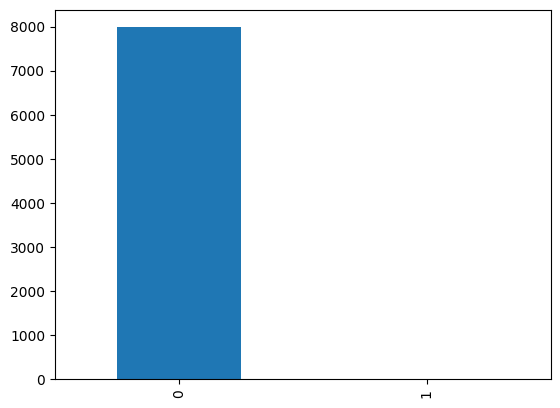

In [30]:
print(data['Class'].value_counts(normalize = True)*100)
data['Class'].value_counts().plot(kind = 'bar')

## Resampling

A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (**under-sampling**) and / or adding more examples from the minority class (**over-sampling**).

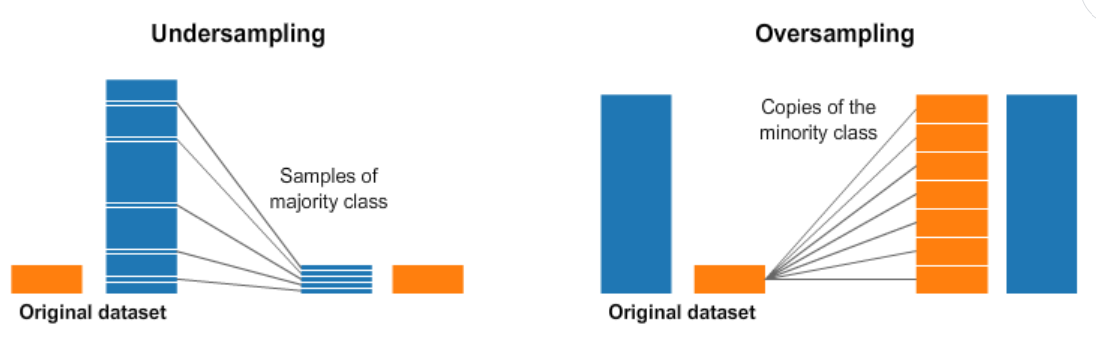


Despite the advantage of balancing classes, these techniques also have their weaknesses (there is no free lunch). The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting. In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

### Undersampling

Undersampling reduces the number of instances in the majority class. Techniques like **Random Undersampling** and **Tomek Links** aim to balance the class distribution.





#### Random Undersampling
Reduces the size of the majority class by randomly discarding instances.

**Application on about dataset**:
For the application, we will use designed fonctions from the python library ***imblearn***.


In [63]:
import imblearn

from imblearn.under_sampling import RandomUnderSampler

In [64]:
X = data.iloc[:, data.columns != 'Class']
Y = data['Class']

Befor Random OverSampling:  Counter({0: 7983, 1: 17})
After Random OverSampling:  Counter({0: 17, 1: 17})


<Axes: title={'center': 'Count (target)'}>

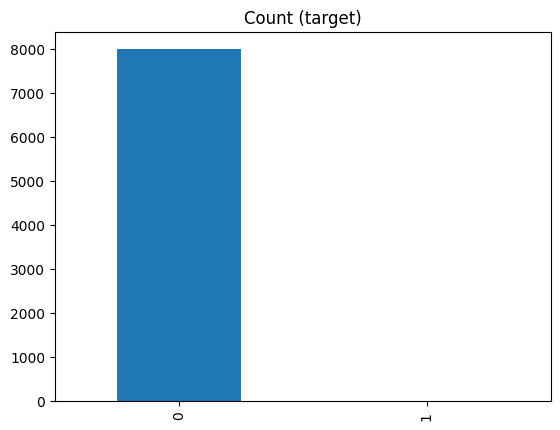

In [69]:
RUS_under = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_RUS_under, Y_RUS_under = RUS_under.fit_resample(X, Y)

# Check class distribution after resampling

print("Befor Random OverSampling: ", Counter(Y))
print("After Random OverSampling: ", Counter(Y_RUS_under))

Y.value_counts().plot(kind='bar', title='Count (target)')

<Axes: title={'center': 'Count (target)'}>

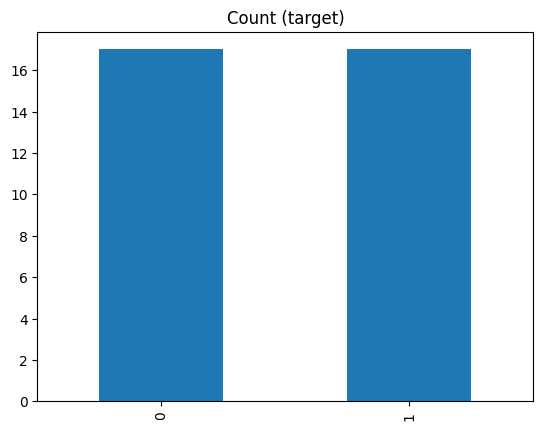

In [70]:
Y_RUS_under.value_counts().plot(kind='bar', title='Count (target)')

#### Undersampling: Tomek links

Eliminates pairs of instances close to each other but belonging to different classes to improve class separability.

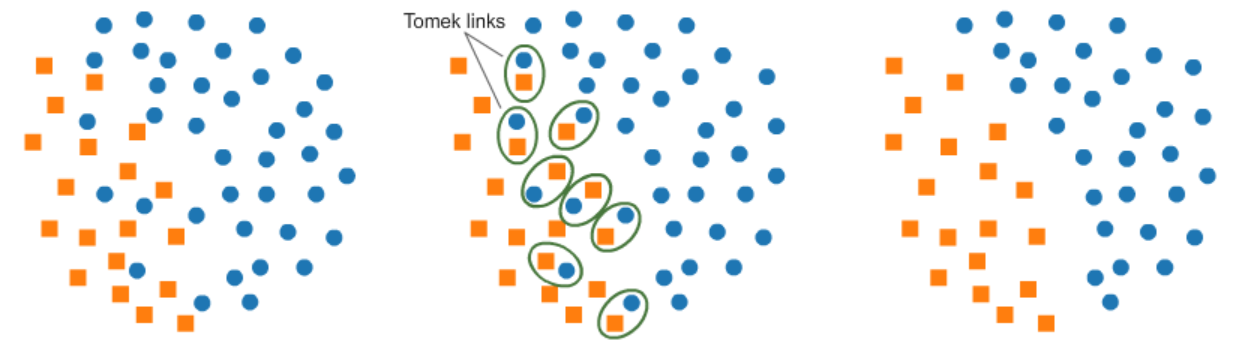


**Application on our dataset**:

Befor Random UnderSampling:  Counter({0: 7983, 1: 17})
After Random UnderSampling:  Counter({0: 7978, 1: 17})


<Axes: title={'center': 'Count (target)'}>

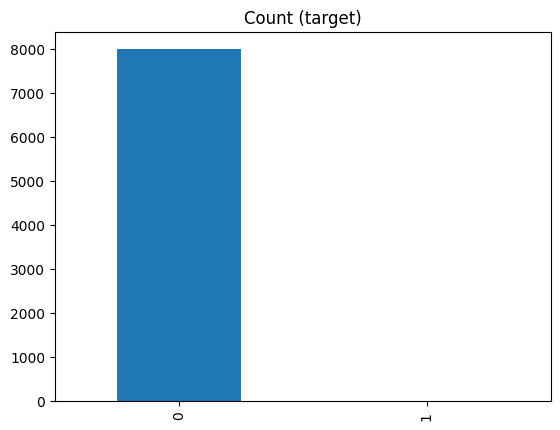

In [71]:
from imblearn.under_sampling import TomekLinks

tomek_under  = TomekLinks(sampling_strategy='auto')
X_tomek_under, Y_tomek_under = tomek_under.fit_resample(X, Y)

# Check class distribution after resampling

print("Befor Random UnderSampling: ", Counter(Y))
print("After Random UnderSampling: ", Counter(Y_tomek_under))

Y.value_counts().plot(kind='bar', title='Count (target)')

<Axes: title={'center': 'Count (target)'}>

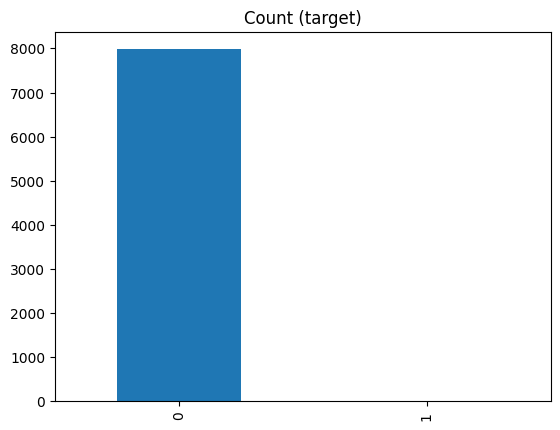

In [72]:
Y_tomek_under.value_counts().plot(kind='bar', title='Count (target)')

### Oversampling

Oversampling involves increasing the number of instances in the minority class. Common methods include **Random Oversampling**, **Synthetic Minority Over-sampling Technique** (SMOTE), and **Adaptive Synthetic Sampling** (ADASYN).



#### Random Oversampling
Oversampling the minority class (fraud cases).
Take random draws from the minority cases and copy those observations to increase the amount of fraud samples.

Befor Random OverSampling:  Counter({0: 7983, 1: 17})
After Random OverSampling:  Counter({0: 7983, 1: 7983})


<Axes: title={'center': 'Count (target)'}>

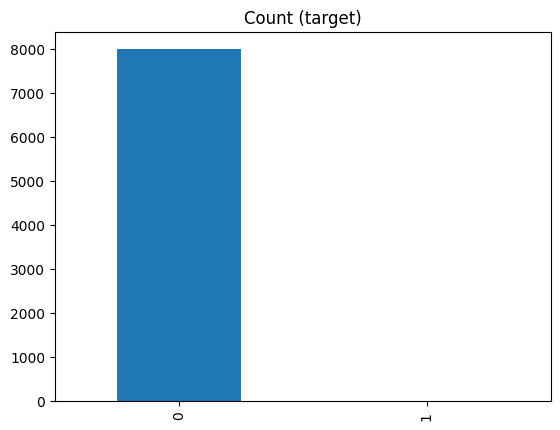

In [74]:
from imblearn.over_sampling import RandomOverSampler

ROS_over = RandomOverSampler()
X_ROS_over, Y_ROS_over = ROS_over.fit_resample(X, Y)

# Check class distribution after resampling

print("Befor Random OverSampling: ", Counter(Y))
print("After Random OverSampling: ", Counter(Y_ROS_over))

Y.value_counts().plot(kind='bar', title='Count (target)')

<Axes: title={'center': 'Count (target)'}>

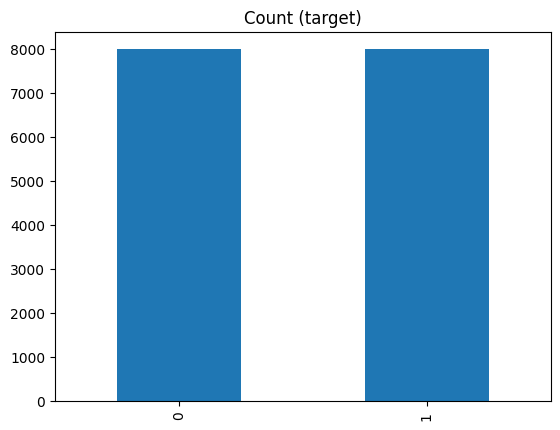

In [76]:
Y_ROS_over.value_counts().plot(kind='bar', title='Count (target)')

#### SMOTE

SMOTE consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

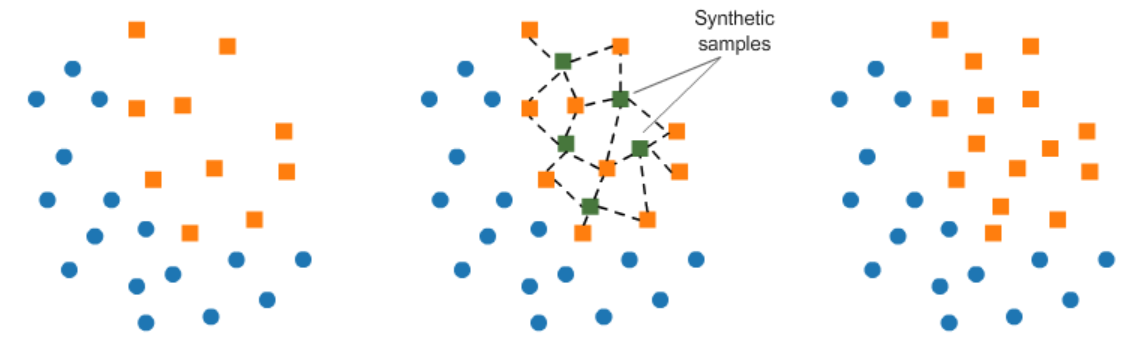

**Application on our dataset**:

Befor SMOTE :  Counter({0: 7983, 1: 17})
After SMOTE :  Counter({0: 7983, 1: 7983})


<Axes: title={'center': 'Count (target)'}>

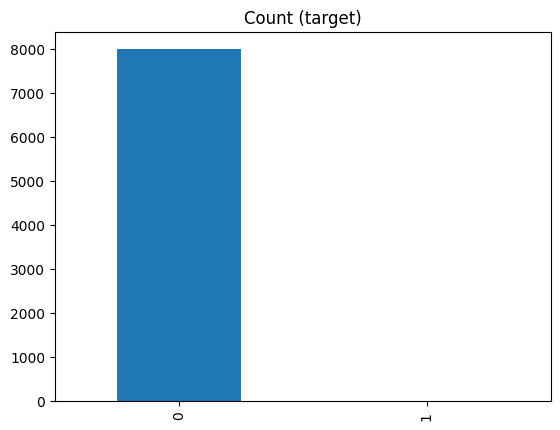

In [80]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_smote, Y_smote = smote.fit_resample(X, Y)

# Check class distribution after resampling

print("Befor SMOTE : ", Counter(Y))
print("After SMOTE : ", Counter(Y_smote))

Y.value_counts().plot(kind='bar', title='Count (target)')

<Axes: title={'center': 'Count (target)'}>

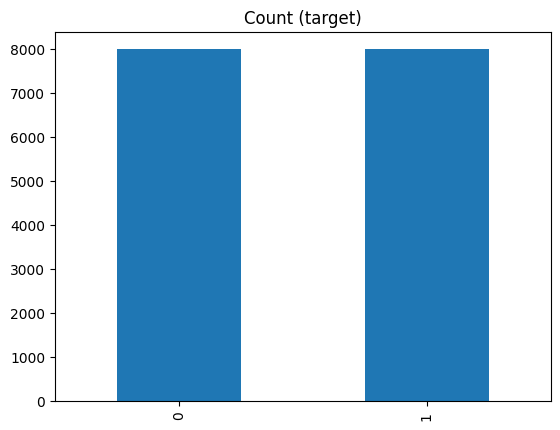

In [81]:
Y_smote.value_counts().plot(kind='bar', title='Count (target)')

### Oversampling followed by Undersampling

One example of combination of oversampling and undersampling, using the SMOTE and Tomek links techniques:

Befor SMOTE/Tomek :  Counter({0: 7983, 1: 17})
After SMOTE/Tomek :  Counter({0: 7978, 1: 7978})


<Axes: title={'center': 'Count (target)'}>

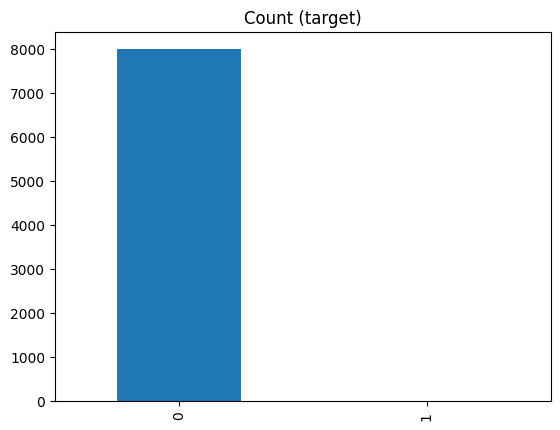

In [85]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek()
X_smote_tomek, Y_smote_tomek = smote_tomek.fit_resample(X, Y)

# Check class distribution after resampling

print("Befor SMOTE/Tomek : ", Counter(Y))
print("After SMOTE/Tomek : ", Counter(Y_smote_tomek))

Y.value_counts().plot(kind='bar', title='Count (target)')

<Axes: title={'center': 'Count (target)'}>

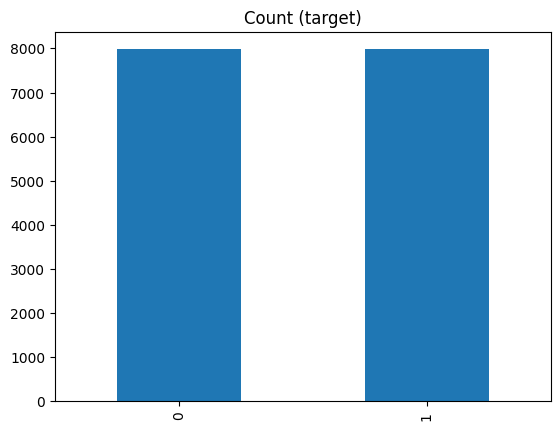

In [86]:
Y_smote_tomek.value_counts().plot(kind='bar', title='Count (target)')

## **Conclusion**:

Imbalanced datasets pose significant challenges, but with the right resampling strategy, you can improve your model's performance. Each resampling method has its blueprint for implementation, offering a tailored approach to tackling the class imbalance problem. Depending on your dataset and problem, choosing the right resampling technique is crucial for building accurate and fair machine learning models.
Moreover, let's mention that there are other methods to handle imbalanced datasets.

In addiction, Imbalanced datasets involve many strategies like the choice of classification metric for instance.



For more follow me!

GUIDJIME ADINSI Ahouahounko
Data Scientist At Abeille Assurance.